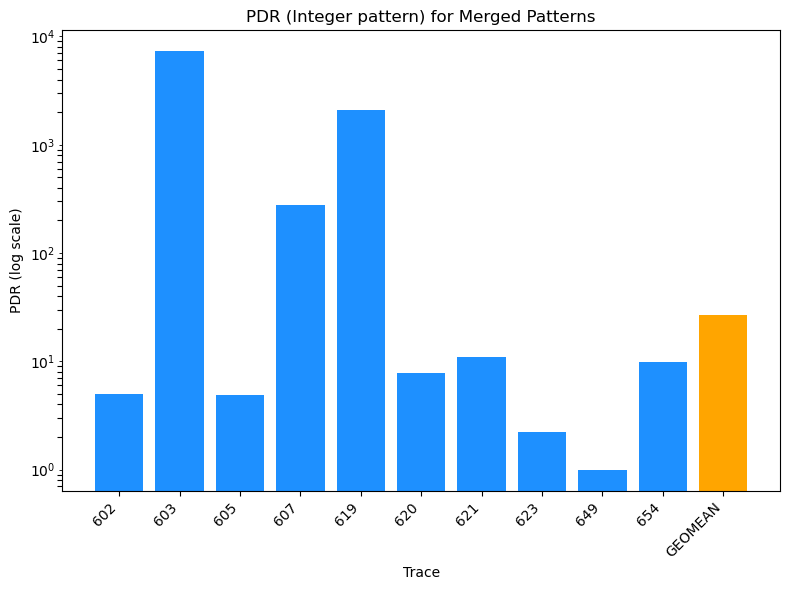

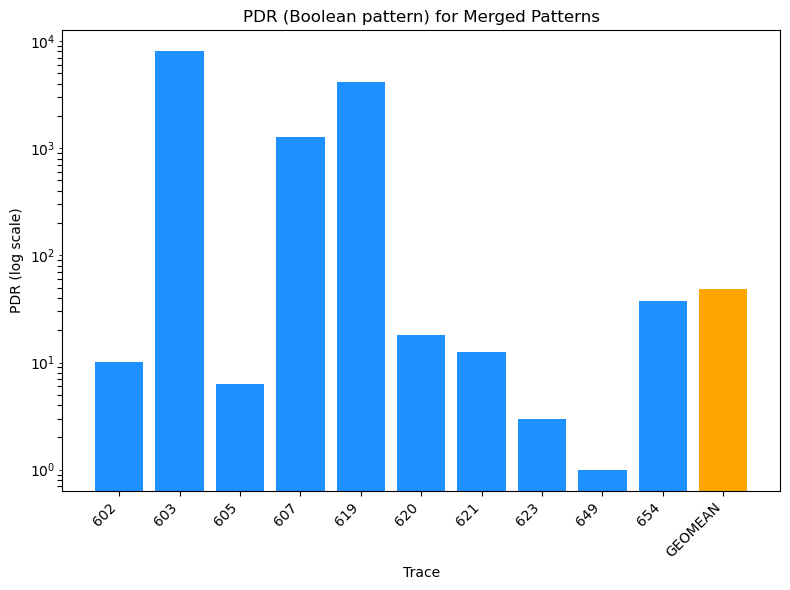

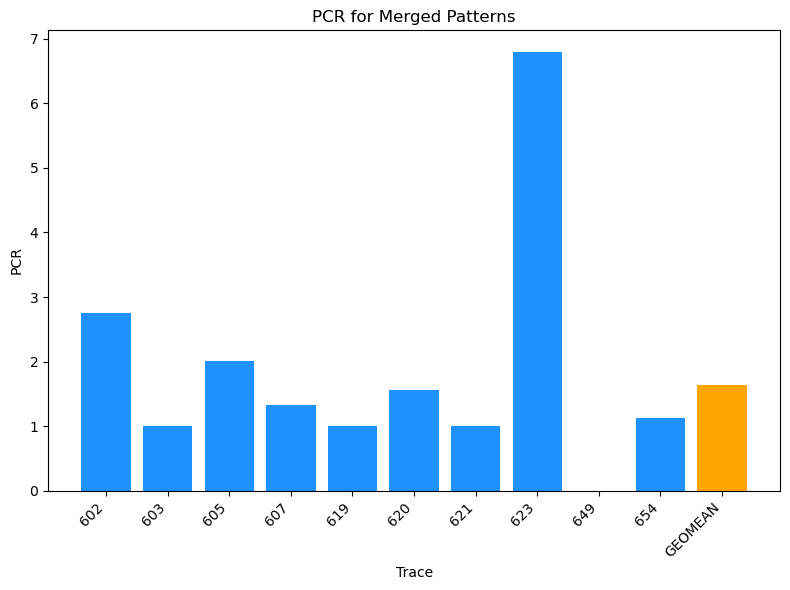

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# Folder containing the metric files
metrics_folder = "./PMP/logs/pmp_metrics"

# Initialize dictionaries to store PDR int, PDR bool, and PCR values
pdr_int = {}
pdr_bool = {}
pcr = {}

# Read data from each file
for filename in os.listdir(metrics_folder):
    if filename.endswith(".txt"):
        trace_name = filename.split(".")[0]
        with open(os.path.join(metrics_folder, filename), "r") as file:
            for line in file:
                if line.startswith("PDR int"):
                    pdr_int[trace_name] = float(line.split()[-1])
                elif line.startswith("PDR bool"):
                    pdr_bool[trace_name] = float(line.split()[-1])
                elif line.startswith("PCR "):
                    pcr[trace_name] = float(line.split()[-1])

# Ensure all dictionaries have consistent keys
all_traces = sorted(set(pdr_int.keys()).union(pdr_bool.keys()).union(pcr.keys()))
for trace in all_traces:
    pdr_int.setdefault(trace, 1e-5)  # Avoid zeros for log scale
    pdr_bool.setdefault(trace, 1e-5)
    pcr.setdefault(trace, 0)  # Use 0 if PCR is missing

# Compute geometric means
def geometric_mean(values):
    return np.exp(np.mean(np.log([v for v in values if v > 0])))  # Ignore zeros in log

pdr_int_values = [pdr_int[trace] for trace in all_traces]
pdr_bool_values = [pdr_bool[trace] for trace in all_traces]
pcr_values = [pcr[trace] for trace in all_traces]

pdr_int_geomean = geometric_mean(pdr_int_values)
pdr_bool_geomean = geometric_mean(pdr_bool_values)
pcr_geomean = geometric_mean(pcr_values)

# Add GEOMEAN to the data
trace_names = all_traces + ["GEOMEAN"]
pdr_int_values.append(pdr_int_geomean)
pdr_bool_values.append(pdr_bool_geomean)
pcr_values.append(pcr_geomean)

# Define bar colors: blue for traces, orange for GEOMEAN
colors_traces = ['dodgerblue'] * (len(all_traces)) + ['orange']

# Plot PDR int with log scale
plt.figure(figsize=(8, 6))
plt.bar(trace_names, pdr_int_values, color=colors_traces)
plt.ylabel("PDR (log scale)")
plt.xlabel("Trace")
plt.title("PDR (Integer pattern) for Merged Patterns")
plt.xticks(rotation=45, ha='right')
plt.yscale("log")
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=10))  # Major ticks
plt.gca().yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0, 1.0), numticks=10))  # Minor ticks
plt.tight_layout()
plt.show()

# Plot PDR bool with log scale
plt.figure(figsize=(8, 6))
plt.bar(trace_names, pdr_bool_values, color=colors_traces)
plt.ylabel("PDR (log scale)")
plt.xlabel("Trace")
plt.title("PDR (Boolean pattern) for Merged Patterns")
plt.xticks(rotation=45, ha='right')
plt.yscale("log")
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=10))  # Major ticks
plt.gca().yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0, 1.0), numticks=10))  # Minor ticks
plt.tight_layout()
plt.show()

# Plot PCR
plt.figure(figsize=(8, 6))
plt.bar(trace_names, pcr_values, color=colors_traces)
plt.ylabel("PCR")
plt.xlabel("Trace")
plt.title("PCR for Merged Patterns")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
print(pdr_int_geomean)
print(pdr_bool_geomean)
print(pcr_geomean)

26.864350955442383
48.243064863833155
1.6441081325971363
